# 7장 딥러닝을 시작합니다.
패션 럭키백을 판매합니다!

## 1. 인공 신경망

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


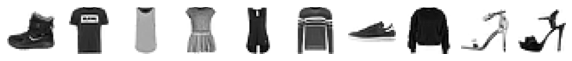

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [10]:
import tensorflow as tf

In [11]:
from tensorflow import keras

In [12]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [13]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [14]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [15]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [16]:
model = keras.Sequential(dense)

In [17]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [18]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [19]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6128 - accuracy: 0.7922
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4793 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4573 - accuracy: 0.8469
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4444 - accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8550


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4403 - accuracy: 0.8541


[0.44027814269065857, 0.8540833592414856]

In [21]:
# 사이킷런 모델

sc = SGDClassifier(loss='log', max_iter=5)
sc.fit(train_scaled, train_target)
sc.score(val_scaled, val_target)

# 케라스 모델

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6048 - accuracy: 0.7980
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4800 - accuracy: 0.8383
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4587 - accuracy: 0.8468
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4443 - accuracy: 0.8520
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4595 - accuracy: 0.8438


[0.459512323141098, 0.84375]

2. 심층 신경망

In [22]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

In [23]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [24]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [25]:
model = keras.Sequential([dense1, dense2])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = keras.Sequential([
                          keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                                             name='hidden'),
        keras.layers.Dense(10, activation='softmax', name='output')
        ], name='패션 MNIST 모델')

In [28]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5574 - accuracy: 0.8103
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4088 - accuracy: 0.8534
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3746 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3526 - accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8788


In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3547 - accuracy: 0.8728


[0.35472315549850464, 0.8728333115577698]

In [33]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [34]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [35]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [36]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [37]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [38]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [39]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5309 - accuracy: 0.8143
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3961 - accuracy: 0.8578
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3049 - accuracy: 0.8883


In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3416 - accuracy: 0.8785


[0.34158000349998474, 0.8784999847412109]

3. 신경망 모델 훈련

In [42]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled,train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [43]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [44]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


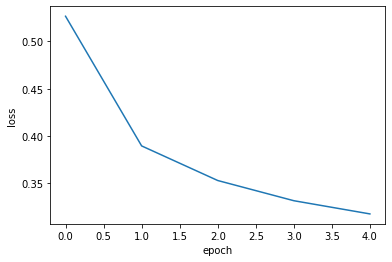

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

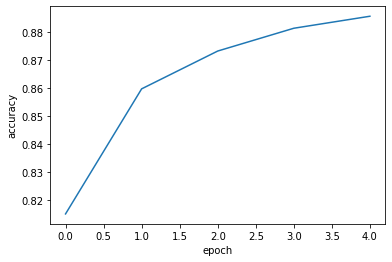

In [48]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

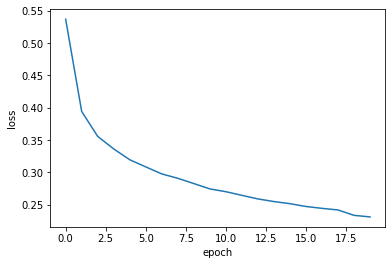

In [49]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


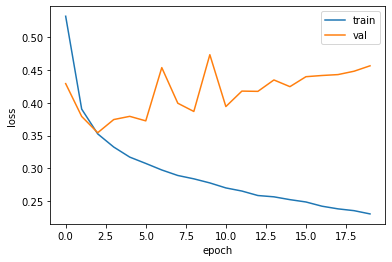

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

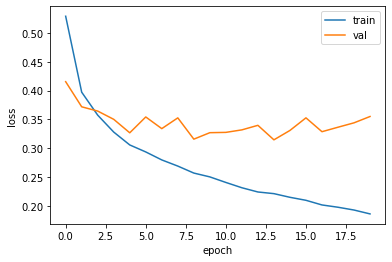

In [53]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [54]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


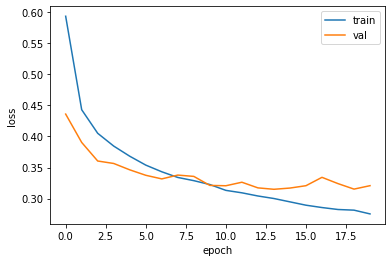

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [56]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [57]:
model.save_weights('model-weights.h5')

In [58]:
model.save('model-whole.h5')

In [59]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Aug 21 13:33 model-weights.h5
-rw-r--r-- 1 root root 981736 Aug 21 13:33 model-whole.h5


In [60]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [61]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8829166666666667


In [62]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8829


[0.327097088098526, 0.8829166889190674]

In [64]:
model= model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [65]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8902


[0.3165830969810486, 0.8901666402816772]

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [67]:
print(early_stopping_cb.stopped_epoch)

11


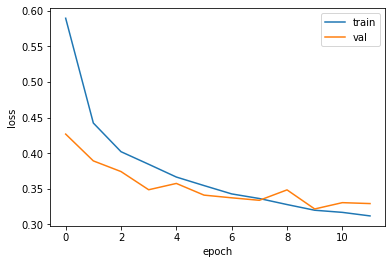

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [69]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8828


[0.3217102587223053, 0.8828333616256714]